<a href="https://colab.research.google.com/github/ckheng78/DeepLearning/blob/master/%5BSubmission%5D_Chee_Kiang_Heng_DSTA_ACV_Quickdraw_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quickdraw

load data  
preprocessing data  
pipeline  
make a model  
train   
evaluate   


In [0]:
!wget -qq https://www.dropbox.com/s/gdlb8dnjzcly51o/quickdraw.zip
  
!unzip -qq quickdraw.zip

!rm -r __MACOSX
!rm quickdraw.zip

!ls

quickdraw  sample_data


In [0]:
!ls quickdraw

'alarm clock.npy'   bee.npy		 cookie.npy	  lollipop.npy
 ambulance.npy	   'birthday cake.npy'	 donut.npy	 'palm tree.npy'
 angel.npy	    brain.npy		 eyeglasses.npy   pig.npy
 ant.npy	    cactus.npy		 face.npy	  postcard.npy
 banana.npy	    cat.npy		 fish.npy	  rainbow.npy


## Imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np

from glob import glob
import ntpath

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import tensorflow as tf

tf.__version__

'2.2.0-rc2'

In [0]:
file_names = glob('./quickdraw/*.npy')
print(file_names)

['./quickdraw/fish.npy', './quickdraw/cat.npy', './quickdraw/birthday cake.npy', './quickdraw/pig.npy', './quickdraw/rainbow.npy', './quickdraw/alarm clock.npy', './quickdraw/brain.npy', './quickdraw/postcard.npy', './quickdraw/eyeglasses.npy', './quickdraw/cookie.npy', './quickdraw/banana.npy', './quickdraw/bee.npy', './quickdraw/face.npy', './quickdraw/donut.npy', './quickdraw/ambulance.npy', './quickdraw/cactus.npy', './quickdraw/ant.npy', './quickdraw/lollipop.npy', './quickdraw/angel.npy', './quickdraw/palm tree.npy']


In [0]:
# get 900 of each class for plotting
# restrict to 10 classes due to resource issues

x_data =np.array([])
y_labels =np.array([])

sample_size = 900

file_names = file_names[0:10]

for i, filename in enumerate(file_names):
  labels = [i for j in range(sample_size)]
  arr = np.load(filename)
  arr = arr[:sample_size]
  if len(x_data) == 0:
    x_data = arr
    y_labels = np.asarray(labels)
  else:
    x_data = np.concatenate((x_data, arr))
    y_labels = np.concatenate((y_labels, labels))

y_labels.shape

(9000,)

## For MNIST

In [0]:
(mnist_x,mnist_y), (_,_) = tf.keras.datasets.mnist.load_data()
mnist_x =mnist_x.reshape(60000,784)

11493376/11490434 [==============================] - 0s 0us/step


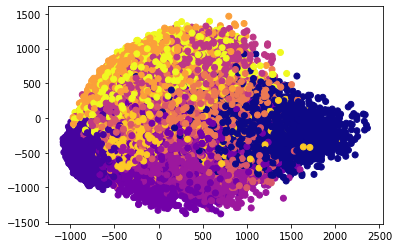

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(mnist_x)
groups = mnist_y.tolist()
colors = [int(i % 20) for i in groups]

plt.scatter(principalComponents[:,0], principalComponents[:,1], c=colors,cmap=plt.cm.plasma)
plt.show()

## PCA for QuickDraw

(2000, 2)


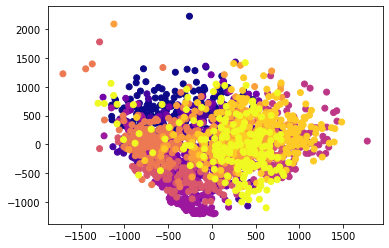

In [0]:
# from sklearn.preprocessing import StandardScaler
# x = StandardScaler().fit_transform(x_data)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_data[:2000])

print(principalComponents.shape)

groups = y_labels.tolist()
colors = [int(i % 20) for i in groups[:2000]]

plt.scatter(principalComponents[:,0], principalComponents[:,1], c=colors,cmap=plt.cm.plasma)
plt.show()

## Plot TSNE  for QuickDraw

In [0]:
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x_data[:2000])

print('t-SNE Finished! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.140s...
[t-SNE] Computed neighbors for 2000 samples in 7.735s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 598.834049
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.913864
[t-SNE] KL divergence after 300 iterations: 1.969560
t-SNE Finished! Time elapsed: 19.208969116210938 seconds


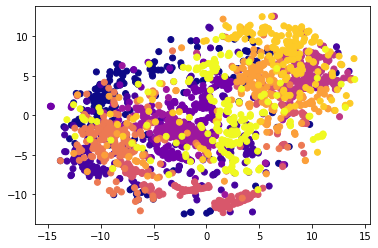

In [0]:
import matplotlib.cm as cm

groups = y_labels.tolist()

colors = [int(i % 20) for i in groups[:2000]]

plt.scatter(tsne_results[:,0], tsne_results[:,1], c=colors,cmap=plt.cm.plasma)
plt.show()

In [0]:
x_data =np.array([])
y_labels =np.array([])

for i, filename in enumerate(file_names):
  labels = [i for j in range(200)]
  arr = np.load(filename)
  arr = arr[:200]
  if len(x_data) == 0:
    x_data = arr
    y_labels = np.asarray(labels)
  else:
    x_data = np.concatenate((x_data, arr))
    y_labels = np.concatenate((y_labels, labels))

In [0]:
x_data.shape, y_labels.shape

((4000, 784), (4000,))

In [0]:
y_labels[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [0]:
# Shuffle
from sklearn.utils import shuffle

x_data, y_labels = shuffle(x_data, y_labels, random_state=42)


# Train test split
from sklearn.model_selection import train_test_split

split = 0.9

x_train, x_test, y_train, y_test = train_test_split(x_data, y_labels, test_size=0.1, random_state=42)


x_train.shape, y_train.shape

((9000, 784), (9000,))

In [0]:
y_labels[:50]

array([3, 5, 5, 2, 1, 0, 1, 4, 4, 3, 4, 0, 1, 1, 6, 7, 2, 6, 3, 2, 1, 6,
       2, 1, 9, 1, 8, 0, 9, 0, 3, 0, 9, 9, 3, 5, 7, 8, 9, 4, 7, 8, 0, 0,
       1, 7, 7, 9, 6, 5])

## Prepare data for network

In [0]:
# Shuffle
from sklearn.utils import shuffle

x_data, y_labels = shuffle(x_data, y_labels, random_state=42)


# Train test split
from sklearn.model_selection import train_test_split

split = 0.8

x_train, x_test, y_train, y_test = train_test_split(x_data, y_labels, test_size=0.1, random_state=42)


x_train.shape, y_train.shape

((8100, 784), (8100,))

x_train_input shape (8100, 224, 224, 3)
x_test_input shape (900, 224, 224, 3)
y_train shape (8100, 10)
y_test shape (900, 10)


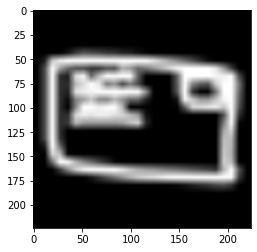

In [0]:
x_height, x_width = 28, 28
x_channels = 1
image_height, image_width = 224, 224
image_channels = 3
num_classes = 10

x_train_input = tf.reshape(x_train, [-1, x_height, x_width, x_channels]).numpy()
x_train_input = x_train_input.astype('float32')
x_train_input /= 255.
x_train_input = tf.image.resize(x_train_input, [image_height, image_width])
x_train_input = tf.image.grayscale_to_rgb(x_train_input)

x_test_input = tf.reshape(x_test, [-1, x_height, x_width, x_channels]).numpy()
x_test_input = x_test_input.astype('float32')
x_test_input /= 255.
x_test_input = tf.image.resize(x_test_input, [image_height, image_width])
x_test_input = tf.image.grayscale_to_rgb(x_test_input)

# convert class vectors to binary class matrices
y_train_output = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_output = tf.keras.utils.to_categorical(y_test, num_classes)


print("x_train_input shape", x_train_input.shape)
print("x_test_input shape", x_test_input.shape)
print("y_train shape", y_train_output.shape)
print("y_test shape", y_test_output.shape)

plt.imshow(x_train_input[7])

## Data Pipeline

In [0]:
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, Conv2D, BatchNormalization
from tensorflow.keras.layers import ReLU, Add, MaxPool2D, GlobalAvgPool2D
from tensorflow.keras.models import Model

print(tf.__version__)

2.2.0-rc2


In [0]:
def Conv_BatchNorm(x, filters, kernel_size, strides):
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

In [0]:
def identity_block(orig_x, num_filters):
    x = Conv_BatchNorm(orig_x, filters=num_filters, kernel_size=1, strides=1)
    x = Conv_BatchNorm(x, filters=num_filters, kernel_size=3, strides=1)
    x = Conv2D(filters=4*num_filters, kernel_size=1, strides=1)(x)  # notice: filters=4*num_filters
    x = BatchNormalization()(x)
 
    x = Add()([x, orig_x])
    x = ReLU()(x)
    return x

In [0]:
def projection_block(tensor, num_filters, strides):
    # left stream
    x = Conv_BatchNorm(tensor, filters=num_filters, kernel_size=1, strides=strides) #[v]
    x = Conv_BatchNorm(x, filters=num_filters, kernel_size=3, strides=1)
    x = Conv2D(filters=4*num_filters, kernel_size=1, strides=1)(x)  # notice: filters=4*num_filters
    x = BatchNormalization()(x)
 
    # right stream
    proj_x = Conv2D(filters=4*num_filters, kernel_size=1, strides=strides)(tensor)  # notice: filters=4*num_filters
    proj_x = BatchNormalization()(proj_x)
 
    x = Add()([x, proj_x])
    x = ReLU()(x)
    return x

In [0]:
def resnet_block(x, filters, reps, strides):
    x = projection_block(x, num_filters=filters, strides=strides)
    for _ in range(reps-1):
        x = identity_block(x, num_filters=filters)
    return x

In [0]:
Inp = Input(shape=(224, 224, 3),name="Inp")
 
x = Conv_BatchNorm(Inp, filters=64, kernel_size=7, strides=2)  
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x) 
 
x = resnet_block(x, filters=64, reps=2, strides=1)
x = resnet_block(x, filters=128, reps=2, strides=2)
x = resnet_block(x, filters=256, reps=2, strides=2)  
x = resnet_block(x, filters=512, reps=2, strides=2)  
 
x = GlobalAvgPool2D()(x)  
output = Dense(num_classes, activation='softmax')(x)  

## Model

In [0]:
model = Model(Inp, output,name='Resnet18')

print(len(model.layers))

model.summary()

95
Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inp (InputLayer)                [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 64) 9472        Inp[0][0]                        
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 112, 112, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 112, 112, 64) 0           batch_normalization[0][0]        
________________________________________________________________________________________

## Train

In [0]:
batch_size=8
epochs = 5
learning_rate = 0.001

#optimizer
opt = tf.keras.optimizers.Adam(lr = learning_rate)

model.compile(loss= tf.keras.losses.categorical_crossentropy,
              optimizer= opt, metrics=['accuracy'])


#model.compile(optimizer='adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#              metrics=['accuracy'])

hist = model.fit(x_train_input, y_train_output,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_input, y_test_output))

Epoch 1/5
1013/1013 [==============================] - 93s 92ms/step - loss: 1.0148 - accuracy: 0.6973 - val_loss: 3.6875 - val_accuracy: 0.3522
Epoch 2/5
1013/1013 [==============================] - 91s 90ms/step - loss: 0.6720 - accuracy: 0.7962 - val_loss: 0.9254 - val_accuracy: 0.7744
Epoch 3/5
1013/1013 [==============================] - 91s 90ms/step - loss: 0.5505 - accuracy: 0.8322 - val_loss: 0.7777 - val_accuracy: 0.7711
Epoch 4/5
1013/1013 [==============================] - 91s 90ms/step - loss: 0.4566 - accuracy: 0.8565 - val_loss: 0.6504 - val_accuracy: 0.8267
Epoch 5/5
1013/1013 [==============================] - 92s 90ms/step - loss: 0.3826 - accuracy: 0.8770 - val_loss: 0.6008 - val_accuracy: 0.8322


## Evaluate 

In [0]:
model.evaluate(x_test_input, y_test_output, batch_size=32)

29/29 [==============================] - 2s 77ms/step - loss: 0.6253 - accuracy: 0.8322


[0.6252935528755188, 0.8322222232818604]

## Predict

In [0]:
for i in range(10):
  x_test_image = x_test_input[i:i+1,:,:,:]
  prediction = np.argmax(model.predict(x_test_image))
  print("i = ", i, ": predicted = ", prediction, " actual = ", np.argmax(y_test_output[i]))

i =  0 : predicted =  9  actual =  9
i =  1 : predicted =  2  actual =  2
i =  2 : predicted =  8  actual =  8
i =  3 : predicted =  3  actual =  1
i =  4 : predicted =  9  actual =  9
i =  5 : predicted =  3  actual =  3
i =  6 : predicted =  4  actual =  4
i =  7 : predicted =  9  actual =  9
i =  8 : predicted =  8  actual =  8
i =  9 : predicted =  6  actual =  6
